In [1]:
import h5py

with h5py.File("/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_noHarmo/BONN_patient_featurematrix.hdf5", "r") as f:
    print(list(f.keys()))  # покажет всех sub-00145, sub-00146 и т.п.


['BONN']


In [6]:
import nibabel as nb

coords_lh, faces_lh = nb.freesurfer.io.read_geometry("/home/s17gmikh/FCD-Detection/meld_graph/data/output/fs_outputs/fsaverage_sym/surf/lh.sphere")
coords_rh, faces_rh = nb.freesurfer.io.read_geometry("/home/s17gmikh/FCD-Detection/meld_graph/data/output/fs_outputs/fsaverage_sym/surf/lh.sphere")

print("LH vertices:", coords_lh.shape[0])
print("RH vertices:", coords_rh.shape[0])
print("Total:", coords_lh.shape[0] + coords_rh.shape[0])

LH vertices: 163842
RH vertices: 163842
Total: 327684


In [7]:
import h5py

with h5py.File('/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00001_featurematrix.hdf5', 'r') as f:
    # Посмотреть всё дерево
    def print_tree(name): print(name)
    f.visit(print_tree)

    # Пример: загрузить маску коры
    cortex_mask = f['BONN/XT/patient/sub-00001/labels/cortex_mask'][:]
    print(cortex_mask.shape, cortex_mask.dtype)

    # Или lesion mask (если она есть)
    lesion_mask = f['BONN/XT/patient/sub-00001/labels/lesion_mask'][:]


BONN
BONN/XT
BONN/XT/patient
BONN/XT/patient/sub-00001
BONN/XT/patient/sub-00001/lh
BONN/XT/patient/sub-00001/lh/.on_lh.curv.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.25.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.75.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.gm_FLAIR_0.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.pial.K_filtered.sm20.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.sulc.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.thickness.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.w-g.pct.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.wm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/lh/.on_lh.wm_FLAIR_1.mgh
BONN/XT/patient/sub-00001/rh
BONN/XT/patient/sub-00001/rh/.on_lh.curv.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.25.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.5.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.75.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.gm_FLAIR_0.mgh
BONN/XT/patient/sub-00001/rh/.on_lh.pial.K_filtered.sm20.mgh
BONN

KeyError: 'Unable to open object (component not found)'

In [5]:
import os
import pandas as pd

# Путь к папке с .hdf5
folder = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"
output_folder = "/home/s17gmikh/FCD-Detection/meld_graph/data"
output_file = "subjects_list.csv"

# Список файлов
filenames = os.listdir(folder)

# Извлечь ID до "_"
subject_ids = sorted(set(
    name.split('_')[0]
    for name in filenames
    if name.endswith(".hdf5")
))

# Создать DataFrame и сохранить в CSV
df = pd.DataFrame(subject_ids, columns=["ID"])
df.to_csv(os.path.join(output_folder, output_file), index=False)

print(f"✅ Saved {len(subject_ids)} subject IDs to {output_file}")


✅ Saved 20 subject IDs to subjects_list.csv


In [25]:
import h5py
import os
import shutil

folder = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"
files = [f for f in os.listdir(folder) if f.endswith("_featurematrix.hdf5")]

for filename in files:
    subj_id = filename.split('_')[0]
    path_in = os.path.join(folder, filename)
    path_tmp = os.path.join(folder, f"tmp_{filename}")

    try:
        with h5py.File(path_in, 'r') as f_in:
            with h5py.File(path_tmp, 'w') as f_out:
                src_group = "BONN/XT/patient/{subj_id}"
                dst_group = f"BONN/XT/patient/{subj_id}"
                f_in.copy(src_group, f_out, name=dst_group)
        # Если всё прошло успешно — заменяем старый файл новым
        os.replace(path_tmp, path_in)
        print(f"✅ {filename}: group renamed to noHarmo")
    except Exception as e:
        print(f"❌ {filename}: {e}")
        if os.path.exists(path_tmp):
            os.remove(path_tmp)


✅ sub-00032_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00146_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00145_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00144_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00142_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00010_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00009_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00004_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00006_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00003_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00001_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00014_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00015_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00140_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00141_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00016_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00018_featurematrix.hdf5: group renamed to noHarmo
✅ sub-00020_featurematrix.hdf5:

In [22]:
import h5py

path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00024_featurematrix.hdf5"

with h5py.File(path, 'r') as f:
    print("Top-level groups in file:")
    for key in f.keys():
        print(" -", key)


Top-level groups in file:
 - BONN


In [2]:
import h5py
with h5py.File('/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146_featurematrix_combat.hdf5', 'r') as f:
    # Посмотреть всё дерево
    def print_tree(name): print(name)
    f.visit(print_tree)

    # # Пример: загрузить маску коры
    # cortex_mask = f['BONN/XT/patient/sub-00001/labels/cortex_mask'][:]
    # print(cortex_mask.shape, cortex_mask.dtype)

    # # Или lesion mask (если она есть)
    # lesion_mask = f['BONN/XT/patient/sub-00001/labels/lesion_mask'][:]


sub-00146
sub-00146/XT
sub-00146/XT/patient
sub-00146/XT/patient/sub-00146
sub-00146/XT/patient/sub-00146/lh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.curv.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.25.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.5.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.75.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.gm_FLAIR_0.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.pial.K_filtered.sm20.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.sulc.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.thickness.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.thickness_regression.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.w-g.pct.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.wm_FLAIR_0.5.sm3.mgh
sub-00146/XT/patient/sub-00146/lh/.combat.on_lh.wm_FLAIR_1.sm3.mgh
sub-00146/XT/patient/sub-00146/rh
sub-00146/XT/patient/sub-00146/rh/.combat.o

In [18]:
import os
import shutil

# Путь к папке с подпапками
base_path = "/home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data"

# Получаем список всех подпапок
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    old_file = os.path.join(folder_path, "noHarmo_featurematrix.hdf5")
    new_file = os.path.join(base_path, f"{folder}_featurematrix.hdf5")
    
    if os.path.exists(old_file):
        shutil.move(old_file, new_file)
        print(f"✅ Перемещено: {old_file} → {new_file}")
    else:
        print(f"⚠️ Файл не найден: {old_file}")


⚠️ Файл не найден: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/MELD_noHarmo/noHarmo_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00032/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00032_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00146_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00145/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00145_featurematrix.hdf5
✅ Перемещено: /home/s17gmikh/FCD-Detection/meld_graph/data/output/preprocessed_surf_data/sub-00144/noHarmo_featurematrix.hdf5 → /home/s17gmikh/FCD-Detection/meld_graph/da

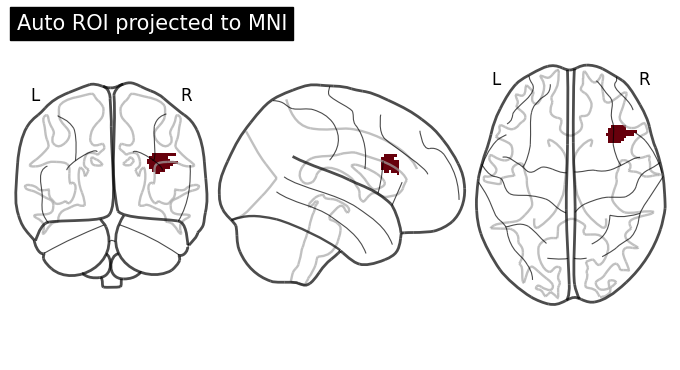

In [5]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np

# Загрузить маску
roi_path = '/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/preprocessed/sub-00146_roi_to_mni.nii.gz'
# Загрузка маски (она должна быть в MNI-пространстве или примерно приведена к нему)
roi_img = nib.load(roi_path)

# Отрисовка
plotting.plot_glass_brain(roi_img, cmap='Reds', threshold=0.2, title='Auto ROI projected to MNI')
plotting.show()

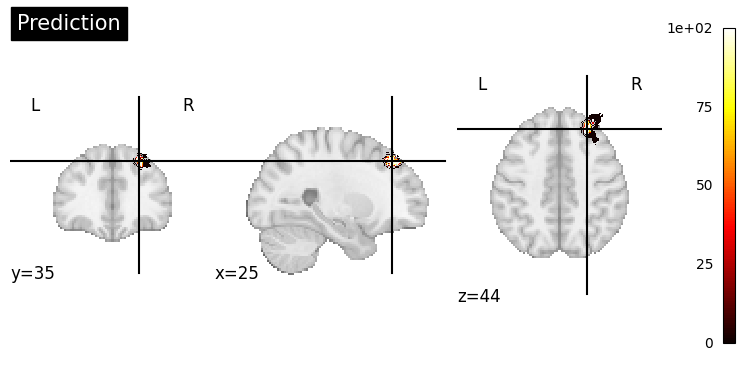

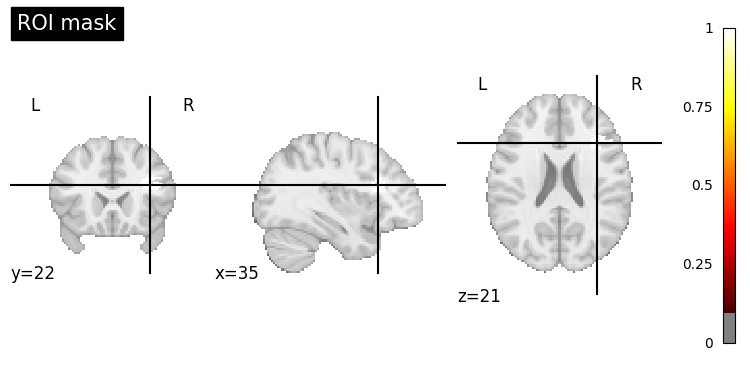

In [37]:
from nilearn.plotting import plot_stat_map

plot_stat_map(pred_img, title="Prediction", threshold=0.1)
plot_stat_map(roi_to_pred, title="ROI mask", threshold=0.1)


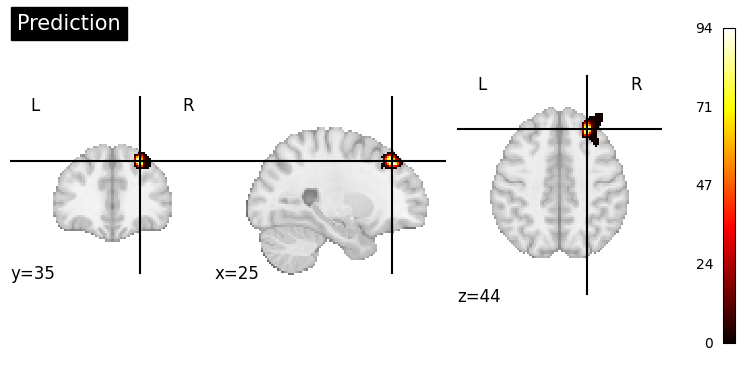

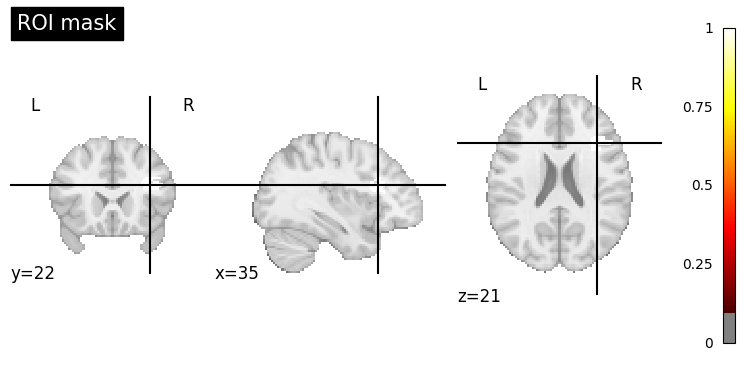

In [25]:
from nilearn.plotting import plot_stat_map

plot_stat_map(pred_img, title="Prediction", threshold=0.1)
plot_stat_map(roi_img, title="ROI mask", threshold=0.1)


In [13]:
print(np.allclose(pred_img.affine, roi_img.affine))  # → True?
print(pred_data.shape, roi_data.shape)  # → должны совпадать

import numpy as np

# Бинаризуем (если это вероятности, а не маски)
pred_mask = pred_data > 0.5  # или просто >0 если уже маска
roi_mask = roi_data > 0

# IoU (intersection over union)
intersection = np.logical_and(pred_mask, roi_mask).sum()
union = np.logical_or(pred_mask, roi_mask).sum()
iou = intersection / union if union != 0 else 0

# Dice coefficient
dice = (2 * intersection) / (pred_mask.sum() + roi_mask.sum())

print(f"IoU: {iou:.3f}")
print(f"Dice: {dice:.3f}")


True
(91, 109, 91) (91, 109, 91)
IoU: 0.000
Dice: 0.000


In [3]:
from nilearn.image import resample_to_img

# Ресемплируем ROI к prediction
roi_resampled = resample_to_img(roi_img, pred_img, interpolation='nearest')
roi_mask = roi_resampled.get_fdata() > 0  # бинаризуем
pred_mask = pred_data > 0.5  # порог предсказания


In [4]:
intersection = np.logical_and(pred_mask, roi_mask).sum()
union = np.logical_or(pred_mask, roi_mask).sum()
iou = intersection / union if union != 0 else 0

print(f"IoU: {iou:.3f}")


IoU: 0.343


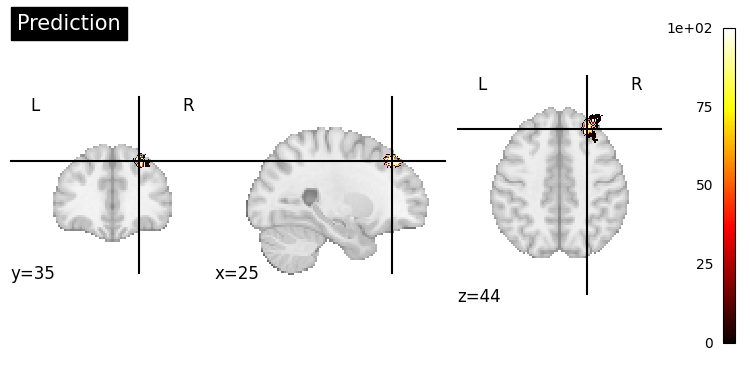

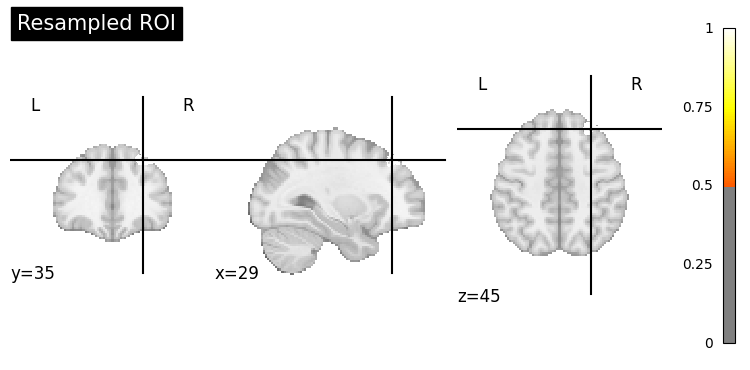

In [5]:
from nilearn import plotting

plotting.plot_stat_map(pred_img, title="Prediction", threshold=0.5)
plotting.plot_stat_map(roi_resampled, title="Resampled ROI", threshold=0.5)


The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



/home/s17gmikh/miniconda3/envs/FCD/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


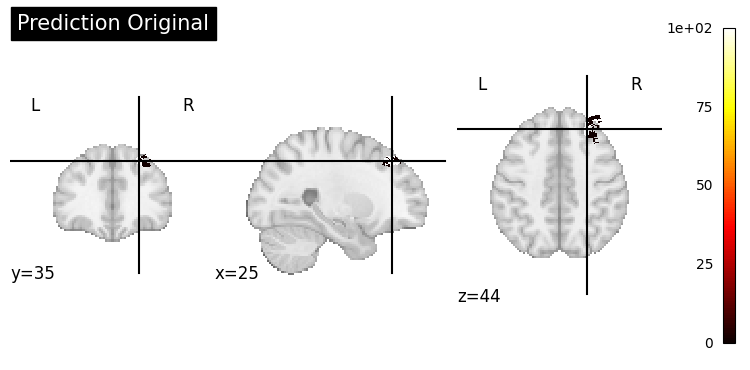

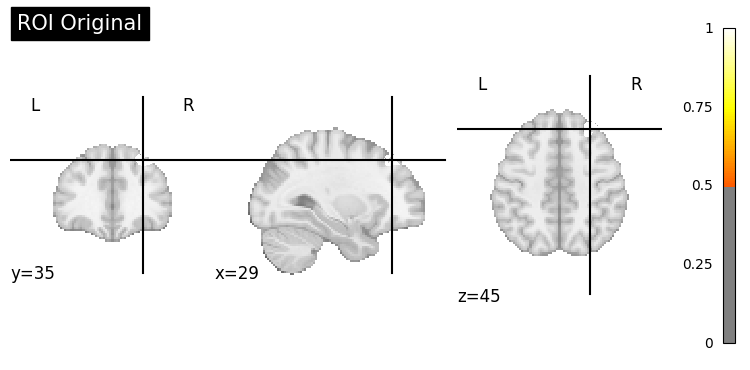

In [25]:
from atlasreader import create_output
from nilearn import datasets, image
import nibabel as nib
from nilearn import plotting
# Загружаем Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm', symmetric_split=True)

# atlas['maps'] уже является путём к .nii.gz, это строка
atlas_img = atlas['maps']

# pred_img = nib.load("/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/sub-00146/sub-00146_prediction_to_mni.nii.gz")
# roi_img = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/preprocessed/sub-00146_roi_to_mni.nii.gz")

pred_img = nib.load('/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/sub-00146/predictions/prediction.nii.gz')
roi_img  = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/sub-00146_acq-T2sel_FLAIR_roi.nii.gz")

pred_resampled = image.resample_to_img(pred_img, roi_img, interpolation='nearest')

# 3. Приводим маску в формат атласа
roi_to_atlas  = image.resample_to_img(roi_img, atlas_img, interpolation="nearest")
pred_to_atlas = image.resample_to_img(pred_img, atlas_img, interpolation="nearest")
# 4. Генерируем отчёт (можно указать outdir для сохранения)
create_output(roi_to_atlas, cluster_extent=5, direction="both")

plotting.plot_stat_map(pred_to_atlas, title="Prediction Original", threshold=0.5)
plotting.plot_stat_map(roi_to_atlas, title="ROI Original", threshold=0.5)

##CORRECT VERSION

/home/s17gmikh/miniconda3/envs/FCD/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(
/home/s17gmikh/miniconda3/envs/FCD/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


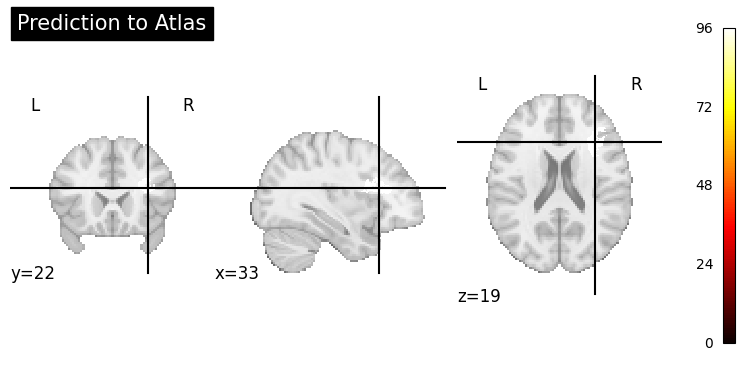

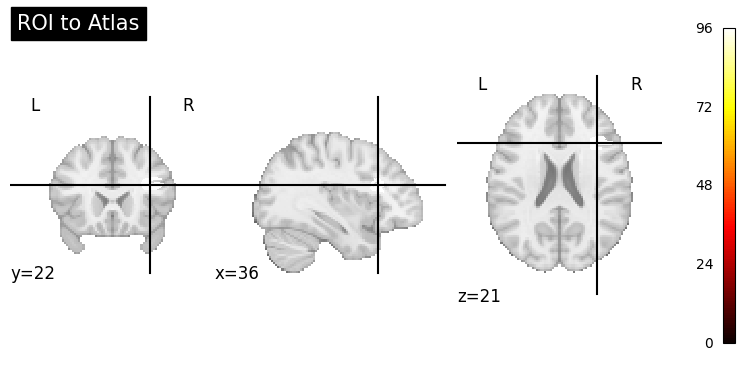

In [42]:
# pred_to_atlas = "/home/s17gmikh/FCD-Detection/meld_graph/example_output/temp/pred_in_mni.nii.gz"
# roi_to_atlas = "/home/s17gmikh/FCD-Detection/meld_graph/example_output/temp/roi_in_mni.nii.gz"
plotting.plot_stat_map(resampled_pred, title="Prediction to Atlas", threshold=0.5)
plotting.plot_stat_map(resampled_roi, title="ROI to Atlas", threshold=0.5)

In [4]:
from nilearn.plotting import plot_glass_brain
from IPython.display import Image
from atlasreader import create_output

import nibabel as nib
import numpy as np
from nilearn.image import resample_to_img
from nibabel.orientations import axcodes2ornt, ornt_transform, aff2axcodes

# Предсказания модели
# pred_img = nib.load("/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/sub-00146/sub-00146_prediction_to_mni.nii.gz")
pred_img = nib.load('/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/sub-00146/predictions/prediction.nii.gz')
pred_data = pred_img.get_fdata()

# # Твоя ROI маска
# roi_img = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/preprocessed/sub-00146_roi_to_mni.nii.gz")
roi_img = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/sub-00146_acq-T2sel_FLAIR_roi.nii.gz")
roi_data = roi_img.get_fdata()

print(np.allclose(pred_img.affine, roi_img.affine))  # True?
print(pred_img.shape, roi_img.shape)                 # Совпадают?

# pred_to_mni = resample_to_img(pred_img, roi_img, interpolation="nearest")
# Бинаризация и сравнение
roi_resampled = resample_to_img(
    roi_img, pred_img,
    interpolation='nearest'  # обязательно nearest для масок
)
roi_mask = roi_resampled.get_fdata() > 0

print(pred_img.affine)
print(roi_img.affine)

pred_mask = pred_data > 0.5

# IoU и Dice
intersection = np.logical_and(pred_mask, roi_mask).sum()
union = np.logical_or(pred_mask, roi_mask).sum()
iou = intersection / union if union != 0 else 0
dice = 2 * intersection / (pred_mask.sum() + roi_mask.sum()) if (pred_mask.sum() + roi_mask.sum()) > 0 else 0

print(f"IoU: {iou:.3f}")
print(f"Dice: {dice:.3f}")


create_output(roi_resampled, cluster_extent=5, direction="both", outdir="/home/s17gmikh/FCD-Detection/meld_graph/data/output/predictions_reports/sub-00146/text_reports")

False
(208, 320, 320) (160, 256, 256)
[[ 7.97851562e-01 -3.39720808e-02  4.77478914e-02 -8.68631516e+01]
 [ 4.10277136e-02  7.89265096e-01 -1.24005318e-01 -9.31596680e+01]
 [-4.18413207e-02  1.26120925e-01  7.88887084e-01 -1.25426735e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 9.97313917e-01 -4.24650982e-02  5.96848652e-02 -8.35684814e+01]
 [ 5.12846150e-02  9.86581385e-01 -1.55006647e-01 -9.28241043e+01]
 [-5.23016229e-02  1.57651156e-01  9.86108840e-01 -1.25370514e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
IoU: 0.343
Dice: 0.511


/home/s17gmikh/miniconda3/envs/FCD/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


In [ ]:
from nilearn import datasets
import nibabel as nib
from nilearn.image import resample_to_img

# Загружаем Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm', symmetric_split=True)

# atlas['maps'] уже является путём к .nii.gz, это строка
atlas_img = atlas['maps']

# Ресемплируем атлас в пространство предсказания
resampled_atlas = resample_to_img(atlas_img, pred_img, interpolation='nearest')

# Сохраняем на диск (по желанию)
nib.save(resampled_atlas, 'resampled_harvardoxford_to_prediction_space.nii.gz')


In [10]:
import numpy as np
import nibabel as nib
from scipy.ndimage import label
from collections import defaultdict

# 1. Бинаризуем предсказание (если не сделано)
pred_data = pred_img.get_fdata()
pred_mask = pred_data > 0.5  # или другой порог

# 2. Определим кластеры в бинарной маске
labeled_mask, num_clusters = label(pred_mask)

print(f"Найдено кластеров: {num_clusters}")

# 3. Загружаем пересемплированный атлас
atlas_data = resampled_atlas.get_fdata().astype(int)

# 4. Загружаем список названий
region_labels = atlas['labels']  # это список вроде ['Background', 'Frontal Pole', ...]

# 5. Анализ: для каждого кластера ищем перекрытие с регионами атласа
cluster_to_regions = defaultdict(set)

for cluster_idx in range(1, num_clusters + 1):
    cluster_voxels = labeled_mask == cluster_idx
    overlapping_labels = np.unique(atlas_data[cluster_voxels])
    
    for label_idx in overlapping_labels:
        if label_idx > 0:  # 0 = фон
            region_name = region_labels[label_idx]
            cluster_to_regions[cluster_idx].add(region_name)

# 6. Печатаем результат
for cluster, regions in cluster_to_regions.items():
    print(f"Кластер {cluster}: {', '.join(sorted(regions))}")


Найдено кластеров: 8
Кластер 1: Frontal Pole, Middle Frontal Gyrus, Superior Frontal Gyrus
Кластер 2: Middle Frontal Gyrus
Кластер 3: Middle Frontal Gyrus
Кластер 4: Middle Frontal Gyrus
Кластер 5: Middle Frontal Gyrus


In [4]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn import plotting
from nilearn.image import resample_to_img
# 1. Привести предсказания к пространству ROI
# resampled_pred = resample_to_img(pred_img, roi_img, interpolation='nearest')

# # 2. Бинаризовать маску
# pred_mask = resampled_pred.get_fdata() > 0.5

# 3. Привести атлас к пространству ROI
# cort-maxprob-thr25-1mm
# atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm', symmetric_split=True)
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=17)

# atlas['maps'] уже является путём к .nii.gz, это строка
atlas_img = atlas['maps']
roi_img = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/sub-00146_acq-T2sel_FLAIR_roi.nii.gz")
# roi_data = roi_img.get_fdata()
resampled_atlas = resample_to_img(atlas_img, roi_img, interpolation='nearest')

# === Загрузим маску и пересемплированный атлас ===
# Твоя бинарная маска (например, из roi_resampled)
mask_data = roi_img.get_fdata() > 0  # или pred_mask

# Загружаем пересемплированный атлас, уже подогнанный к маске
atlas_data = resampled_atlas.get_fdata().astype(int)

# Метки из исходного атласа
region_labels = atlas['labels']

# === Подсчёт вокселей ===
mask_size = np.sum(mask_data)  # всего вокселей в маске
region_ids, region_counts = np.unique(atlas_data[mask_data], return_counts=True)

# Исключим фон
region_info = []
for region_id, count in zip(region_ids, region_counts):
    if region_id == 0:
        continue
    region_name = region_labels[region_id]
    percent = 100 * count / mask_size
    region_info.append((region_name, percent))

# === Сортируем и выводим ===
region_info.sort(key=lambda x: -x[1])  # по убыванию процента

for name, perc in region_info:
    print(f"{perc:.2f}% of {name}")

46.40% of b'17Networks_RH_DefaultA_pCunPCC_1'
17.99% of b'17Networks_RH_ContB_PFCld_2'
16.42% of b'17Networks_RH_ContC_pCun_1'
6.82% of b'17Networks_RH_DefaultB_PFCv_1'
0.15% of b'17Networks_RH_SalVentAttnB_Ins_1'
0.15% of b'17Networks_RH_ContB_PFClv_1'


In [19]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn.image import resample_to_img
import pandas as pd

# === Загрузка ROI-маски ===
roi_img = nib.load("/home/s17gmikh/FCD-Detection/data/ds004199/sub-00146/anat/sub-00146_acq-T2sel_FLAIR_roi.nii.gz")
roi_data = roi_img.get_fdata()
mask_data = roi_data > 0
mask_size = np.sum(mask_data)

# === Атласы ===
atlas_defs = {
    "schaefer": datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=17),
}

# Добавим все варианты Harvard-Oxford
harvard_variants = [
    'cort-maxprob-thr0-1mm',
    'cort-maxprob-thr25-1mm',
    'cort-maxprob-thr50-1mm',
    'sub-maxprob-thr0-1mm',
    'sub-maxprob-thr25-1mm',
    'sub-maxprob-thr50-1mm',
    # вероятностные карты можно использовать отдельно
]

# Добавим все атласы в словарь
for name in harvard_variants:
    try:
        atlas_defs[f"harvard_{name}"] = datasets.fetch_atlas_harvard_oxford(name, symmetric_split=True)
    except Exception as e:
        print(f"Не удалось загрузить {name}: {e}")

# === Расшифровка для Schaefer ===
label_map = {
    "DefaultA": "Default Mode Network A", "DefaultB": "Default Mode Network B", "DefaultC": "Default Mode Network C",
    "ContA": "Control Network A", "ContB": "Control Network B", "ContC": "Control Network C",
    "DorsAttnA": "Dorsal Attention Network A", "DorsAttnB": "Dorsal Attention Network B",
    "SalVentAttnA": "Salience/Ventral Attention Network A", "SalVentAttnB": "Salience/Ventral Attention Network B",
    "LimbicA": "Limbic Network A", "LimbicB": "Limbic Network B",
    "SomMotA": "Somatomotor Network A", "SomMotB": "Somatomotor Network B",
    "VisCent": "Visual Central Network", "VisPeri": "Visual Peripheral Network",
    "TempPar": "Temporoparietal Network", "pCunPCC": "Precuneus / Posterior Cingulate Cortex",
    "PFCld": "Lateral Dorsal Prefrontal Cortex", "PFClv": "Lateral Ventral Prefrontal Cortex",
    "PFCv": "Ventral Prefrontal Cortex", "Ins": "Insular Cortex",
}

def decode_label(label, atlas_name):
    if isinstance(label, bytes):
        label = label.decode("utf-8")
    if atlas_name == "schaefer":
        for k, v in label_map.items():
            if k in label:
                label = label.replace(k, v)
        label = label.replace("RH_", "Right Hemisphere, ")
        label = label.replace("LH_", "Left Hemisphere, ")
        label = label.replace("_", "; ")
        label = label.replace("17Networks;", "")
    return label

# === Объединённая таблица с колонками по атласам ===
combined_df = pd.DataFrame()

# Проходим по всем атласам
for atlas_name, atlas in atlas_defs.items():
    print(atlas_name, atlas)
    if atlas_name == 'yeo_17':
        atlas_img = atlas['thick_17']
        region_labels = atlas['colors_17']
    else:
        atlas_img = atlas['maps']
        region_labels = atlas['labels']
        
    resampled_atlas = resample_to_img(atlas_img, roi_img, interpolation='nearest')
    atlas_data = resampled_atlas.get_fdata().astype(int)

    region_ids, region_counts = np.unique(atlas_data[mask_data], return_counts=True)

    region_percentages = {}
    for region_id, count in zip(region_ids, region_counts):
        if region_id == 0:
            continue
        label = decode_label(region_labels[region_id], atlas_name)
        percent = 100 * count / mask_size
        region_percentages[label] = percent

    series = pd.Series(region_percentages, name=atlas_name)
    combined_df = pd.concat([combined_df, series], axis=1)

# Заменим NaN на 0 (если регион не перекрывался)
combined_df.fillna(0, inplace=True)

# === Сохраняем в CSV ===
combined_df.to_csv("combined_atlas_overlap.csv")

# 46.40% of b'17Networks_RH_DefaultA_pCunPCC_1'
# 17.99% of b'17Networks_RH_ContB_PFCld_2'
# 16.42% of b'17Networks_RH_ContC_pCun_1'
# 6.82% of b'17Networks_RH_DefaultB_PFCv_1'
# 0.15% of b'17Networks_RH_SalVentAttnB_Ins_1'
# 0.15% of b'17Networks_RH_ContB_PFClv_1'

schaefer {'maps': '/home/s17gmikh/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_17Networks_order_FSLMNI152_1mm.nii.gz', 'labels': array([b'17Networks_LH_VisCent_ExStr_1', b'17Networks_LH_VisCent_ExStr_2',
       b'17Networks_LH_VisCent_Striate_1',
       b'17Networks_LH_VisCent_ExStr_3', b'17Networks_LH_VisCent_ExStr_4',
       b'17Networks_LH_VisCent_ExStr_5',
       b'17Networks_LH_VisPeri_ExStrInf_1',
       b'17Networks_LH_VisPeri_ExStrInf_2',
       b'17Networks_LH_VisPeri_ExStrInf_3',
       b'17Networks_LH_VisPeri_StriCal_1',
       b'17Networks_LH_VisPeri_ExStrSup_1',
       b'17Networks_LH_VisPeri_ExStrSup_2', b'17Networks_LH_SomMotA_1',
       b'17Networks_LH_SomMotA_2', b'17Networks_LH_SomMotA_3',
       b'17Networks_LH_SomMotA_4', b'17Networks_LH_SomMotA_5',
       b'17Networks_LH_SomMotA_6', b'17Networks_LH_SomMotA_7',
       b'17Networks_LH_SomMotA_8', b'17Networks_LH_SomMotB_Aud_1',
       b'17Networks_LH_SomMotB_Aud_2', b'17Networks_LH_SomMotB_S2_1',
       b'17Net

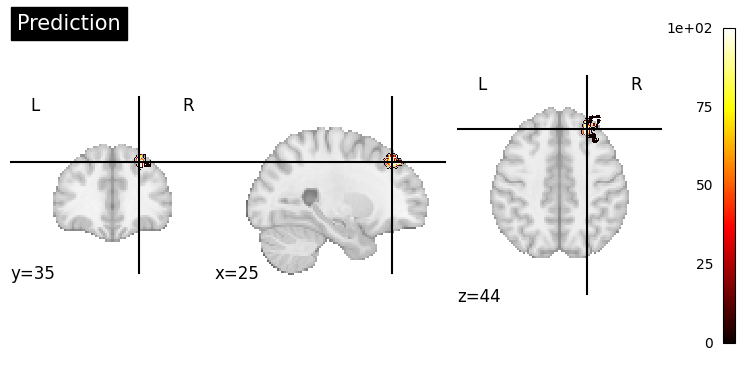

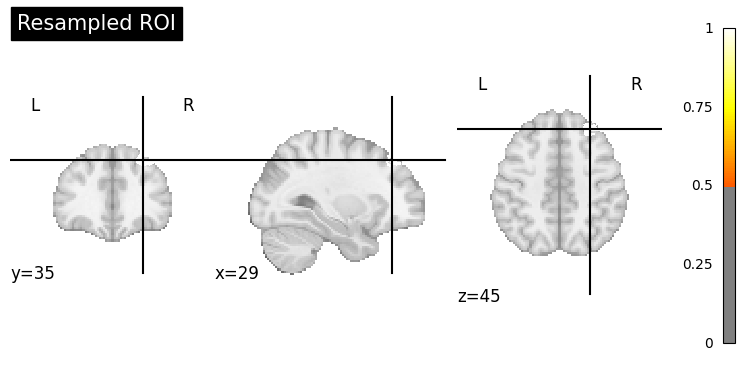

In [14]:
from nilearn import plotting

# 1. Привести предсказания к пространству ROI
resampled_pred = resample_to_img(pred_img, roi_img, interpolation='nearest')

# 2. Бинаризовать маску
pred_mask = resampled_pred.get_fdata() > 0.5

# 3. Привести атлас к пространству ROI
resampled_atlas = resample_to_img(atlas_img, roi_img, interpolation='nearest')

# 4. Считать проценты по маске, как раньше

plotting.plot_stat_map(resampled_pred, title="Prediction", threshold=0.5)
plotting.plot_stat_map(roi_img, title="Resampled ROI", threshold=0.5)